<h3> In this project we gonna predict quality of wine using logistoc regression model.

In [ ]:
#importing needed libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns

In [ ]:
#Importing data from drive
red =  pd.read_csv(r'/content/drive/MyDrive/wine_quality/winequality-red.csv', delimiter=';', quotechar='"')

white = pd.read_csv(r'/content/drive/MyDrive/wine_quality/winequality-white.csv', delimiter=';', quotechar='"')

# Concatenate the two DataFrames vertically
wine = pd.concat([red, white], axis=0)

# Save the combined DataFrame to a new CSV file
wine.to_csv('wine_quality.csv', index=False)

# Display the first few rows of the combined DataFrame
print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
wine.shape

(6497, 12)

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [ ]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


<h3> Exploratory Data Analysis


In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# checking unique value (eg: ? or any other symmbol which are basically representating missing value)
'''for i in wine.columns:
  print({i: wine[i].unique()}) '''

# In output we can see there is only int and float value no other value which reperesenting as null or missing value

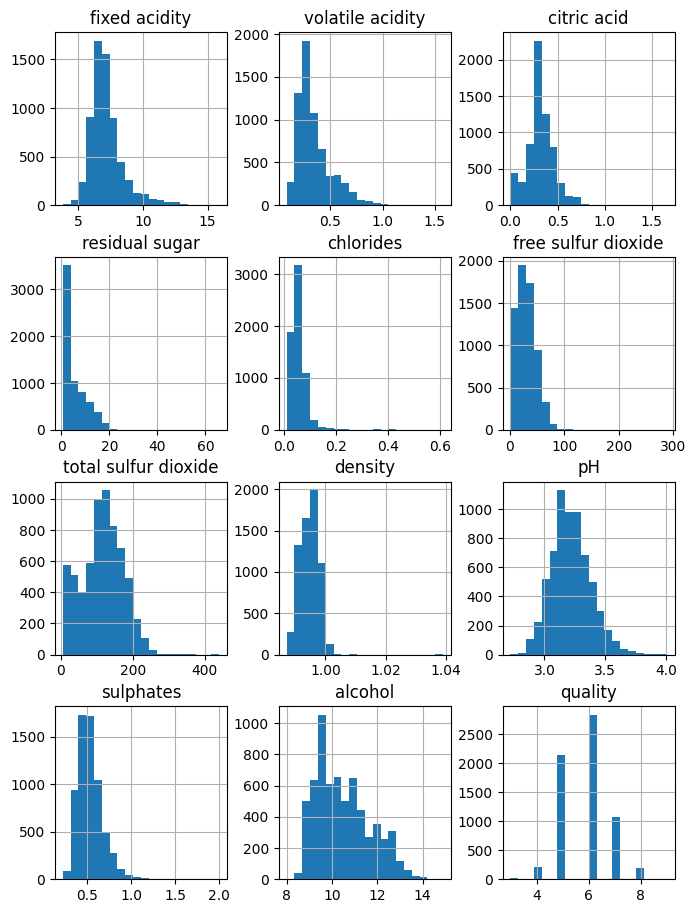

In [ ]:
#Ussing histogram for checking the distribution in data
wine.hist(bins = 20,figsize=(8,11))
plt.show()

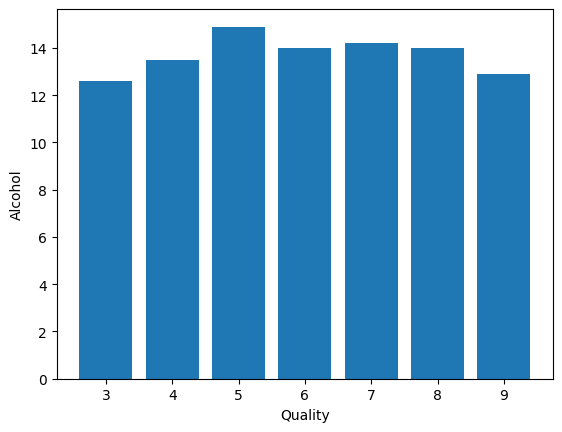

In [ ]:
# Now using countplot for checking the number of data for each quality wine
plt.bar(wine['quality'], wine['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

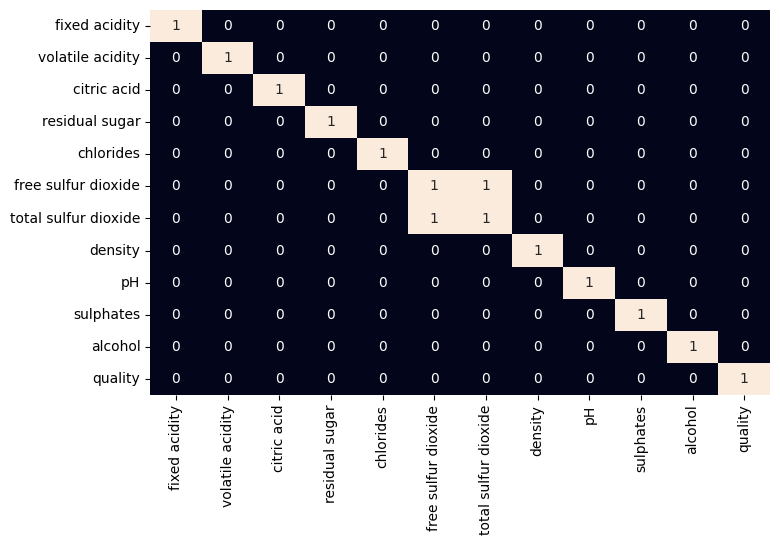

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(wine.corr()>0.7,annot=True, cbar=False)
plt.show()

# In output we can see total sulfur dioxide and free sulfur dioxide is high co-related so i will drop one column

In [ ]:
wine.drop(['free sulfur dioxide'],axis = 1,inplace  = True)

In [ ]:
wine.shape
# Now we are done with EDA i will start developing the model

(6497, 11)

<h3> Model Developing

In [ ]:
wine['Good Quality'] = [ 1 if i > 5 else 0 for i in wine['quality']]

In [ ]:
# spliting the data in 2 variable X and Y
# X = Feature
# Y = Target

X = wine.values[:,0:10]
Y = wine.values[:,-1]

In [ ]:
# Scaling the data using StandarScaler method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X,Y)
X = scaler.transform(X)


In [ ]:
# now spliting data in training and testing for both variable using train_test_split method
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=7)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 10)
(1300, 10)
(5197,)
(1300,)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred

array([1., 1., 1., ..., 0., 1., 1.])

In [ ]:
print(list(zip(wine.columns[:],lr.coef_.ravel())))

[('fixed acidity', 0.08699423494901383), ('volatile acidity', -0.7326246946198542), ('citric acid', -0.06734976195788674), ('residual sugar', 0.45261311641807167), ('chlorides', -0.02236322563904223), ('total sulfur dioxide', -0.23832646628176188), ('density', -0.20689667052717012), ('pH', 0.12991902018187235), ('sulphates', 0.3109826394054021), ('alcohol', 1.0144853750078144)]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\n Classification Report:\n",classification_report(y_test,y_pred))
print("\n Accuracy Score :",accuracy_score(y_test,y_pred))
print("Validation Accuracy :",roc_auc_score( y_test,y_pred))

Confusion Matrix:
 [[261 190]
 [129 720]]

 Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.58      0.62       451
         1.0       0.79      0.85      0.82       849

    accuracy                           0.75      1300
   macro avg       0.73      0.71      0.72      1300
weighted avg       0.75      0.75      0.75      1300


 Accuracy Score : 0.7546153846153846
Validation Accuracy : 0.7133852530301725
